# IRELAND DATASET

In [36]:
# importing packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')


#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# Descriptive Statistics for the Target feature: crop value

In [37]:
#Reading in df_irishdmodels cleaned dataset

df_irishdata = pd.read_csv('df_irishmodels.csv')



In [38]:
df_irishdata

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...,...
57655,57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [39]:
df_irishdata.crops_type.unique()

array(['Apples', 'Barley', 'Beans, green', 'Berries nes',
       'Broad beans, horse beans, dry', 'Butter, cow milk',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cereals nes',
       'Chillies and peppers, green', 'Cucumbers and gherkins',
       'Currants', 'Leeks, other alliaceous vegetables',
       'Lettuce and chicory', 'Mushrooms and truffles', 'Oats',
       'Oil, coconut (copra)', 'Onions, dry', 'Peas, dry', 'Peas, green',
       'Potatoes', 'Raspberries', 'Rye', 'Spinach', 'Strawberries',
       'Sugar beet', 'Tomatoes', 'Vegetables, leguminous nes', 'Wheat',
       'Whey, dry', 'Apricots', 'Avocados', 'Bananas', 'Chestnut', 'Figs',
       'Fruit, citrus nes', 'Fruit, pome nes', 'Fruit, stone nes',
       'Grain, mixed', 'Grapefruit (inc. pomelos)', 'Grapes',
       'Hazelnuts, with shell', 'Kiwi fruit', 'Lemons and limes',
       'Lupins', 'Maize', 'Melons, other (inc.cantaloupes)', 'Nuts nes',
       'Olives', 'Oranges',

In [40]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
df_irishdata.describe()

,Unnamed: 0,Year,crop_value,import_export_value
count,57660.000000,57660.000000,5.766000e+04,57660.000000
mean,28829.500000,2018.649462,1.931997e+05,9073.481408
std,16645.152598,1.067478,4.719297e+05,20373.360680
min,0.000000,2017.000000,2.000000e+00,25.000000
25%,14414.750000,2018.000000,5.890000e+03,331.000000
50%,28829.500000,2019.000000,1.492495e+05,2099.000000
75%,43244.250000,2020.000000,1.492495e+05,8378.000000
max,57659.000000,2020.000000,3.920000e+06,157805.000000


In [41]:
df_irishdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57660 entries, 0 to 57659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           57660 non-null  int64  
 1   Year                 57660 non-null  int64  
 2   country              57660 non-null  object 
 3   crop_measurement     57660 non-null  object 
 4   crops_type           57660 non-null  object 
 5   crops_action         57660 non-null  object 
 6   crop_value           57660 non-null  float64
 7   import_export_value  57660 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [42]:
#Barley.mean()

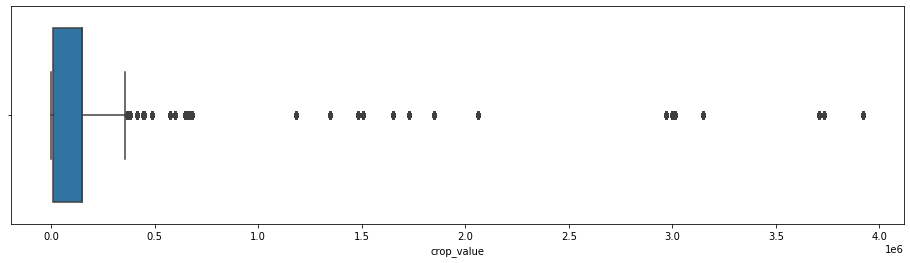

In [43]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= df_irishdata['crop_value'])
plt.show()

In [44]:
#print the std of the target feature
std_cropvalue = df_irishdata["crop_value"].std()
print(std_cropvalue)

471929.7023057815


In [45]:
#print the variance of the target feature

var_cropvalue= df_irishdata["crop_value"].var()
print(var_cropvalue)

222717643918.42355


In [46]:
#print the mean of the target feature
mean_cropvalue= df_irishdata['crop_value'].mean()
print(mean_cropvalue)

193199.6637651423


In [47]:
#print the median of the target feature
median = df_irishdata['crop_value'].median()
print(median)

149249.4953422438


In [48]:
#print the mode of the target feature
mode = df_irishdata['crop_value'].mode()
print(mode)

0    149249.495342
Name: crop_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

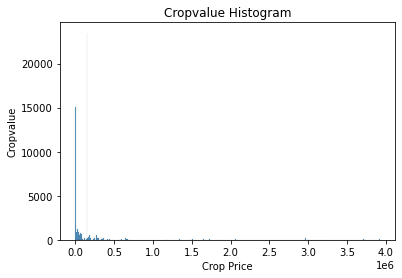

In [49]:
#histplot to display the distribution of crop _value
ax = sns.histplot(df_irishdata.crop_value)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

We can see from the above graph that the variable crop_value is slightly right or postively skewed

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

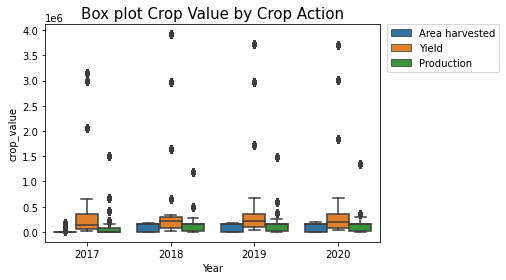

In [50]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'Year', y ='crop_value', data=df_irishdata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

# Ireland Annual mean variance plot

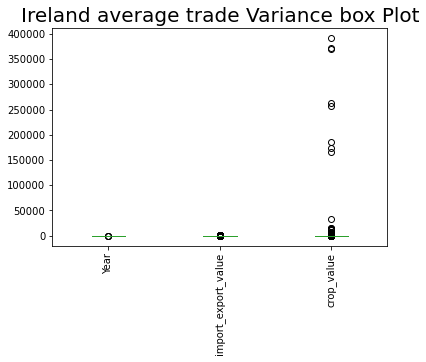

In [51]:
df_irishdata[['Year', 'import_export_value', 
                           'crop_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland average trade Variance box Plot", fontsize=20);

# Ireland annual cropvalue and Import_export variance plot

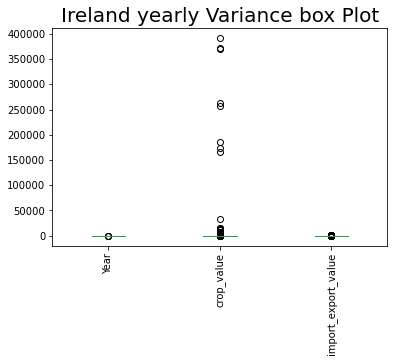

In [52]:
df_irishdata[['Year', 'crop_value', 
                           'import_export_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland yearly Variance box Plot", fontsize=20);

# Using Chi-square test on a the IrishCrops dataset

In [53]:
import pandas
df= pandas.read_csv("FAOSTAT_data_5-1-2022 (2).csv")
categorical_col = ['Domain', 'Area', 'Element', 'item', 'Unit']
print(categorical_col)


['Domain', 'Area', 'Element', 'item', 'Unit']


using the crosstab() function to create a contingency table of the two selected variables to work on ‘Element’ and ‘item’.

In [54]:
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
print(chisqt)

Unit                          0.1g/An  1000 Head  1000 No  100mg/An  Head  \
Domain                                                                      
Crops and livestock products       38         90        8         8   237   
All                                38         90        8         8   237   

Unit                          No/An   ha  hg/An  hg/ha  tonnes   All  
Domain                                                                
Crops and livestock products      8  470     68    294     908  2129  
All                               8  470     68    294     908  2129  


At last, we apply the chi2_contingency() function on the table and get the statistics, p-value and degree of freedom values

In [55]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
value = np.array([chisqt.iloc[0][0:10].values,
                  chisqt.iloc[1][0:10].values])
print(chi2_contingency(value)[0:3])

(0.0, 1.0, 9)


From above, 1.0 is the p-value, 0.0 is the statistical value and 9 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Domain’ and ‘Unit’ are independent of each other.

# Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

In [56]:
# Example of the Shapiro-Wilk Normality Tes
from scipy.stats import shapiro
year= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution

# Shapiro-Wilk Test

In [57]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
crops_action = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(crops_action)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

Since in the above example, the p-value is 0.0001 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.


Assumptions

Observations in each sample are independent and identically distributed (iid). 

Observations in each sample are normally distributed. Observations in each sample have the same variance.


In [58]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_action= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, crop_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent. 
    
H1: there is a dependency between the samples


# Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked

In [59]:
from scipy.stats import spearmanr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_measurement = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(crop_value, crop_measurement)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples

# D’Agostino’s K^2 Test - Normality Test

Tests whether a data sample has a Gaussian distribution.


In [60]:
from scipy.stats import normaltest
df_irish = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(df_irish)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution. 
    
H1: the sample does not have a Gaussian distribution.


# Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.


In [61]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
crop_value = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


We can see that the P - value for crop value is greater than 0.5 and is probably independant

# Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

# Parametric Statistical Hypothesis Tests

This section lists statistical tests that you can use to compare data samples


# Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Observations across each sample are paired.


In [62]:
df_irishdata.head(500)

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...,...
495,495,2017,Ireland,ha,Barley,Area harvested,180186.0,31564.0
496,496,2017,Ireland,hg/ha,Barley,Yield,83570.0,615.0
497,497,2017,Ireland,hg/ha,Barley,Yield,83570.0,545.0
498,498,2017,Ireland,hg/ha,Barley,Yield,83570.0,1985.0


In [63]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
import_export_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
year = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(import_export_value, year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.


# We can see that the P value for Year is greater than 0.5 and is therefore of the same distribution

# We can see that the P Value for all test s above has not been greater than 0.5

# Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).  

Observations in each sample are normally distributed. 

Observations in each sample have the same variance


In [67]:
# Example of the Analysis of Variance Test
import statistics as stats
from scipy.stats import f_oneway
import_export_value= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_value = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
crops_action = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(import_export_value, crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


Interpretation

H0: the means of the samples are equal.

H1: one or more of the means of the samples are unequal.


# Nonparametric Statistical Hypothesis Tests

Tests whether the distributions of two independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.


In [29]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
crop_measurement = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_type = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(crop_measurement, crop_type)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


# Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid). Observations in each sample can be ranked. Observations across each sample are paired.


In [30]:
#example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crops_action = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.


In [31]:
#checking the shape and size of the dataframe

print("Shape of the dataset is : ",df_irishdata.shape)
print("Size of the dataset is : ",df_irishdata.size)

Shape of the dataset is :  (57660, 8)
Size of the dataset is :  461280


In [32]:
#list the datatypes of all columns we can see there are alot of objects later I will change these to onehotencoding for the linear regression
df_irishdata.dtypes

Unnamed: 0               int64
Year                     int64
country                 object
crop_measurement        object
crops_type              object
crops_action            object
crop_value             float64
import_export_value    float64
dtype: object

# Plot Distribution of the Target variable/feature crop_value

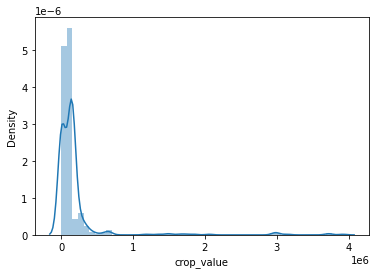

In [33]:
# plot distribution of crop_value target variable seaborn distplot
sns.distplot(df_irishdata['crop_value'])
plt.show()

The crop_value is not normally distributed the distribution is skewed left because it looks pulled out to the left

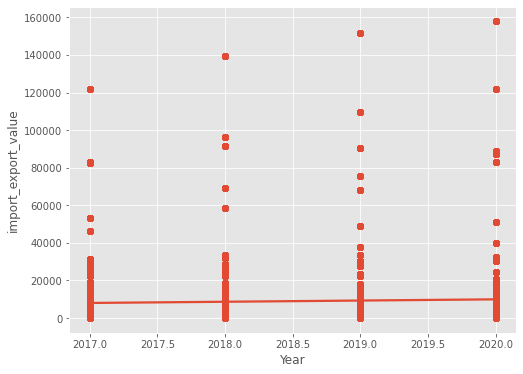

In [70]:
#  Plot style
plt.style.use("ggplot")
# creating a figure 
plt.figure(figsize=(8,6))
# Plot a scatterplot with a fitted regression line
sns.regplot(x = df_irishdata["Year"], y = df_irishdata["import_export_value"])
# Show the plot
plt.show()

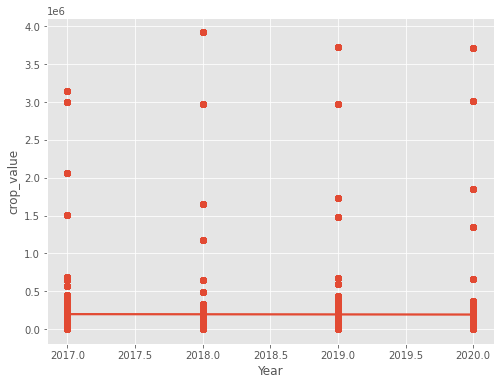

In [71]:
#  Plot style
plt.style.use("ggplot")
# creating a figure 
plt.figure(figsize=(8,6))
# Plot a scatterplot with a fitted regression line
sns.regplot(x = df_irishdata["Year"], y = df_irishdata["crop_value"])
# Show the plot
plt.show()

# Brazilian Dataset

# Descriptive Statistics for the Target features: crop value & consumervalue

In [73]:
#Reading in Brazilian Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_brazildata = pd.read_csv('df_brazilmodels.csv')
df_brazildata.head()

,Unnamed: 0,year,country,months,crop_measurement,crops_type,crops_action,crop_value,consumer_value
0,1464,2010,Brazil,January,tonnes,Chestnut,Production,5.333023e+06,3.559127
1,1471,2010,Brazil,August,tonnes,Chestnut,Production,5.333023e+06,4.098498
2,1465,2010,Brazil,February,tonnes,Chestnut,Production,5.333023e+06,4.271629
3,1470,2010,Brazil,July,tonnes,Chestnut,Production,5.333023e+06,4.338587
4,1469,2010,Brazil,June,tonnes,Chestnut,Production,5.333023e+06,5.074611


In [74]:
#Dropping ID and Source column from the data for outlier analysis
df_brazildata.drop(columns=["Unnamed: 0","country"],axis=1,inplace=True)
df_brazildata.dtypes

year                  int64
months               object
crop_measurement     object
crops_type           object
crops_action         object
crop_value          float64
consumer_value      float64
dtype: object

In [75]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
df_brazildata.describe()

,year,crop_value,consumer_value
count,83520.000000,8.352000e+04,83520.000000
mean,2014.975431,5.372101e+06,68.105087
std,3.151619,5.199071e+07,45.941999
min,2010.000000,9.000000e+00,-2.317125
25%,2012.000000,1.347600e+04,10.043639
50%,2015.000000,8.797600e+04,80.803340
75%,2018.000000,3.935035e+05,111.989600
max,2020.000000,7.685942e+08,141.626625


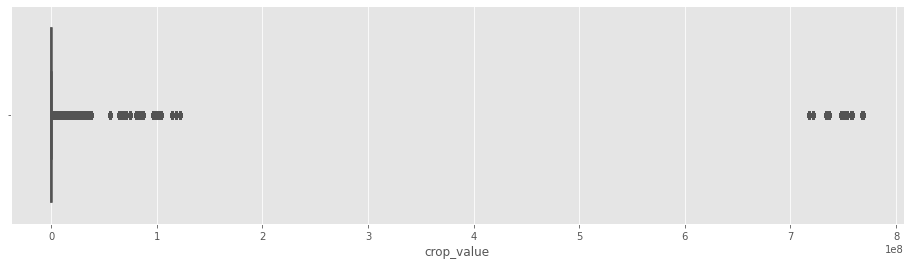

In [76]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= df_brazildata['crop_value'])
plt.show()

In [77]:
#print the mean of the target feature
mean_cropvalue=  df_brazildata['crop_value'].mean()
print(mean_cropvalue)

5372100.747240936


In [78]:
#print the median of the target feature
median = df_brazildata['crop_value'].median()
print(median)

87976.0


In [79]:
#print the mode of the target feature
mode = df_brazildata['crop_value'].mode()
print(mode)

0    5.333023e+06
Name: crop_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

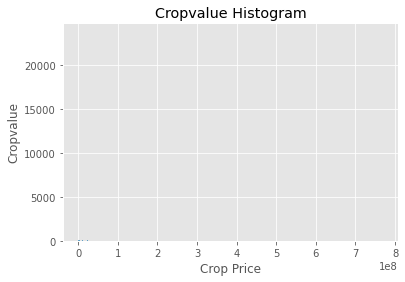

In [80]:
#histplot to display the distribution of crop _value
ax = sns.histplot(df_brazildata.crop_value)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

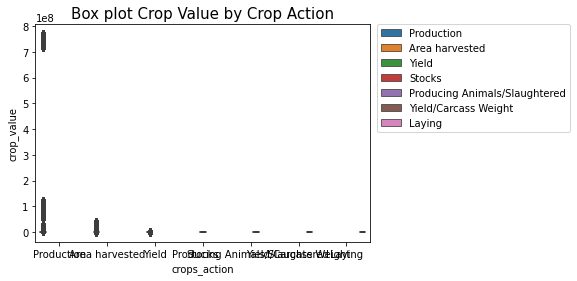

In [31]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'crops_action', y ='crop_value', data=df_brazildata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

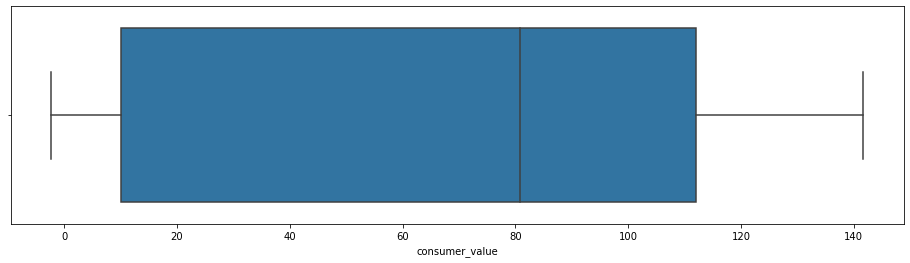

In [32]:
#boxplot for the feature rain
plt.figure(figsize = (16,4))
sns.boxplot(x= df_brazildata['consumer_value'])
plt.show()

In [33]:
#print the mean of the target feature
mean_consumervalue=  df_brazildata['consumer_value'].mean()
print(mean_consumervalue)

68.1050868260576


In [34]:
#print the median of the target feature
median = df_brazildata['consumer_value'].median()
print(median)

80.80334


In [35]:
#print the mode of the target feature
mode = df_brazildata['consumer_value'].mode()
print(mode)

0    72.17294
Name: consumer_value, dtype: float64


In [36]:
#print the Stardard dev of the target feature
std = df_brazildata['consumer_value'].std()
print(std)

45.941998883991026


[Text(0.5, 0, 'Consumer Price'),
 Text(0, 0.5, 'consumervalue'),
 Text(0.5, 1.0, 'Consumervalue Histogram')]

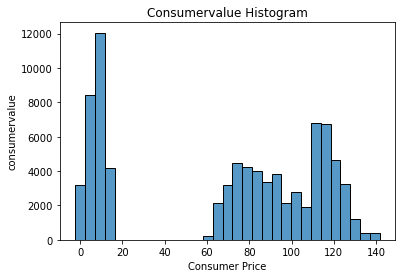

In [49]:
#histplot to display the distribution of consumer _value
ax = sns.histplot(df_brazildata.consumer_value)
ax.set(xlabel='Consumer Price', ylabel='consumervalue', title ='Consumervalue Histogram')

Text(0.5, 1.0, 'Box plot Consumer Value by Crop Action')

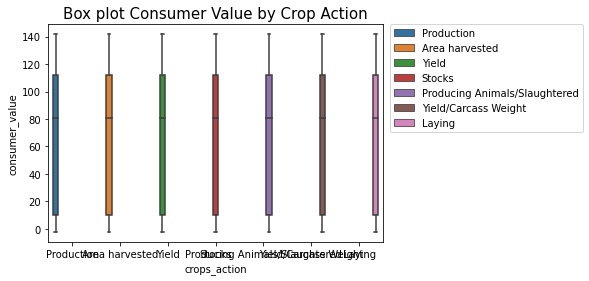

In [50]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'crops_action', y ='consumer_value', data=df_brazildata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Consumer Value by Crop Action', fontsize=15)

# Shapiro-Wilk Test - Normality Test - Target crop_value

Tests whether a data sample has a Gaussian distribution. examines if a variable is normally distributed in a population


In [51]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution



# Shapiro-Wilk Test - Normality Test - Target Consumer_value

Tests whether a data sample has a Gaussian distribution. Examines if a variable is normally distributed in a population Crop Value Consumer Value Crops_action

In [52]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
consumer_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(consumer_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


In [53]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
crop_type = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_type)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


if the result is >0.05 the result is normal, the data significantly deviate from a normal distribution if <0.05


In [54]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
crops_action = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(crops_action)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

Since in the above example, the p-value is 0.0001 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Crop_Value & Crop Action


Assumptions

    Observations in each sample are independent and identically distributed (iid).

    Observations in each sample are normally distributed.

    Observations in each sample have the same variance.

In [55]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_action= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, crop_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Crop_Value & consumer_value


In [57]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
consumer_value= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, consumer_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked


In [59]:
from scipy.stats import spearmanr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_measurement = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(crop_value, crop_measurement)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples


# D’Agostino’s K^2 Test - Normality Test

Tests whether a data sample has a Gaussian distribution.


In [60]:
from scipy.stats import normaltest
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution


# Using Chi-square test on a df_brazil dataset on the categorical features

In [61]:
import os
import pandas

df = pandas.read_csv("FAOSTAT_brazil_5-1-2022(4).csv")
categorical_col = ['Domain', 'Area', 'Item', 'Element','Unit']
print(categorical_col)

['Domain', 'Area', 'Item', 'Element', 'Unit']


using the crosstab() function to create a contingency table of the two selected variables to work on ‘crops_type’ and ‘crops_action’.

In [62]:
chisqt = pandas.crosstab(df.Domain, df.Element, margins=True)
print(chisqt)

Element                       Area harvested  Laying  Milk Animals  \
Domain                                                               
Crops and livestock products             781      22            22   
All                                      781      22            22   

Element                       Producing Animals/Slaughtered  Production  \
Domain                                                                    
Crops and livestock products                            231        1467   
All                                                     231        1467   

Element                       Stocks  Yield  Yield/Carcass Weight   All  
Domain                                                                   
Crops and livestock products     143    844                    99  3609  
All                              143    844                    99  3609  


we apply the chi2_contingency() function on the table and get the statistics, p-value and degree of freedom values

In [63]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pandas.crosstab(df.Domain, df.Element, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(0.0, 1.0, 4)


From above, 1.0 is the p-value, 0.0 is the statistical value and 4 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Domain’ and ‘Element’ are independent of each other

In [64]:
df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Brazil,Area harvested,"Almonds, with shell",2010,ha,NaN
1,Crops and livestock products,Brazil,Area harvested,"Almonds, with shell",2011,ha,NaN
2,Crops and livestock products,Brazil,Area harvested,"Almonds, with shell",2012,ha,NaN
3,Crops and livestock products,Brazil,Area harvested,"Almonds, with shell",2013,ha,NaN
4,Crops and livestock products,Brazil,Area harvested,"Almonds, with shell",2014,ha,NaN


# Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.


In [65]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
crop_value = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


# We can see that the P - value for crop value is greater than 0.5 and is probably independant

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.


# Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.


In [66]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
max_airtemp = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
min_airtemp = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(max_airtemp, min_airtemp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


Interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.


# Parametric Statistical Hypothesis Tests

This section lists statistical tests that you can use to compare data samples


Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

 Observations in each sample are independent and identically distributed (iid). 

 Observations in each sample are normally distributed. 

 Observations in each sample have the same variance. 
    
Observations across each sample are paired.

In [67]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
rain = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
year = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(rain, year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.


# We can see that the P value for Year is greater than 0.5 and is therefore of the same distribution

In [68]:
df_brazildata

,year,months,crop_measurement,crops_type,crops_action,crop_value,consumer_value
0,2010,January,tonnes,Chestnut,Production,5.333023e+06,3.559127
1,2010,August,tonnes,Chestnut,Production,5.333023e+06,4.098498
2,2010,February,tonnes,Chestnut,Production,5.333023e+06,4.271629
3,2010,July,tonnes,Chestnut,Production,5.333023e+06,4.338587
4,2010,June,tonnes,Chestnut,Production,5.333023e+06,5.074611
...,...,...,...,...,...,...,...
83515,2020,August,tonnes,Sugar cane,Production,7.571169e+08,130.229147
83516,2020,September,tonnes,Sugar cane,Production,7.571169e+08,133.208033
83517,2020,October,tonnes,Sugar cane,Production,7.571169e+08,135.798369
83518,2020,November,tonnes,Sugar cane,Production,7.571169e+08,139.230564


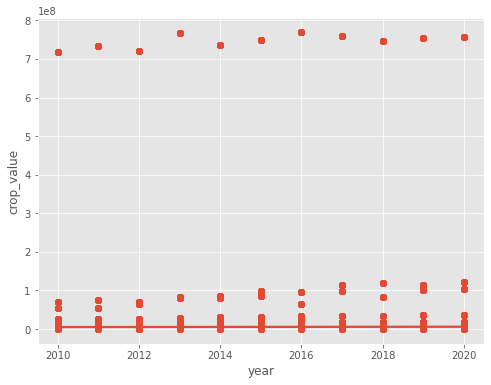

In [69]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x=df_brazildata['year'], y = df_brazildata["crop_value"])
plt.show()

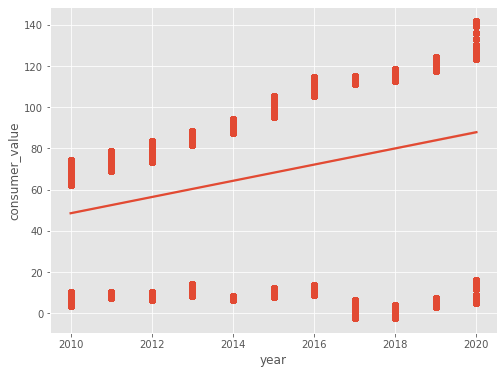

In [70]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df_brazildata["year"], y = df_brazildata["consumer_value"])
plt.show()

# European Dataset

# Descriptive Statistics for the Target feature: crop value

In [73]:
europeagri_consumer = pd.read_csv('tag00044_linear.csv')
europeagri_consumer.head()

,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2015,8.70,NaN
1,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2016,11.37,NaN
2,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2017,10.29,NaN
3,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2018,7.34,NaN
4,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2019,5.61,NaN


In [74]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
europeagri_consumer.describe()

,TIME_PERIOD,OBS_VALUE
count,437.000000,425.000000
mean,2015.645309,625.228588
std,3.351031,1645.350126
min,2010.000000,0.540000
25%,2013.000000,14.470000
50%,2016.000000,71.930000
75%,2018.000000,452.120000
max,2021.000000,7931.690000


In [75]:
europeagri_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     437 non-null    object 
 1   LAST UPDATE  437 non-null    object 
 2   freq         437 non-null    object 
 3   unit         437 non-null    object 
 4   meatitem     437 non-null    object 
 5   meat         437 non-null    object 
 6   geo          437 non-null    object 
 7   TIME_PERIOD  437 non-null    int64  
 8   OBS_VALUE    425 non-null    float64
 9   OBS_FLAG     47 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 34.3+ KB


In [76]:
#changing the datatype of Value from object to a float must be careful to check if there are no numbers in the column they
#will be come NAN
europeagri_consumer['OBS_VALUE'] = pd.to_numeric(europeagri_consumer['OBS_VALUE'],errors = 'coerce')

In [77]:
print(europeagri_consumer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     437 non-null    object 
 1   LAST UPDATE  437 non-null    object 
 2   freq         437 non-null    object 
 3   unit         437 non-null    object 
 4   meatitem     437 non-null    object 
 5   meat         437 non-null    object 
 6   geo          437 non-null    object 
 7   TIME_PERIOD  437 non-null    int64  
 8   OBS_VALUE    425 non-null    float64
 9   OBS_FLAG     47 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 34.3+ KB
None


In [78]:
europeagri_consumer.describe()

,TIME_PERIOD,OBS_VALUE
count,437.000000,425.000000
mean,2015.645309,625.228588
std,3.351031,1645.350126
min,2010.000000,0.540000
25%,2013.000000,14.470000
50%,2016.000000,71.930000
75%,2018.000000,452.120000
max,2021.000000,7931.690000


In [79]:
##check rows where dependent variable is equal to zero
europeagri_consumer.loc[europeagri_consumer['OBS_VALUE']==0]

,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG


In [80]:
#We can see for the value column there are over 4613 rows with the value 0 I want to find the mean value of the column
print(europeagri_consumer['OBS_VALUE'].mean()) 

625.2285882352941


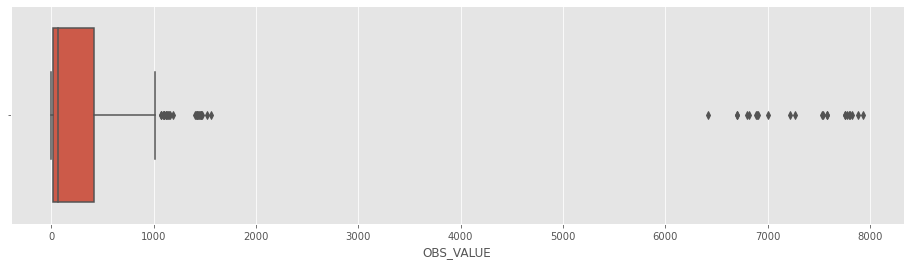

In [85]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= europeagri_consumer['OBS_VALUE'])
plt.show()

In [86]:
#print the mean of the target feature
mean_eurovalue= europeagri_consumer['OBS_VALUE'].mean()
print(mean_eurovalue)

618.596795180723


In [87]:
#print the median of the target feature
median = europeagri_consumer['OBS_VALUE'].median()
print(median)

65.53


In [89]:
#print the median of the target feature
median = europeagri_consumer['OBS_VALUE'].mode()
print(mode)

0    72.17294
Name: consumer_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

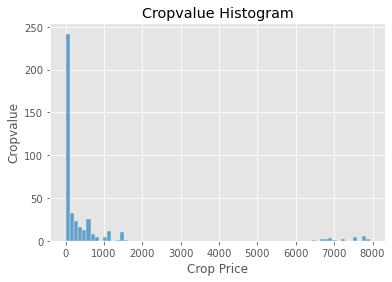

In [91]:
#histplot to display the distribution of crap _value
ax = sns.histplot(europeagri_consumer.OBS_VALUE)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

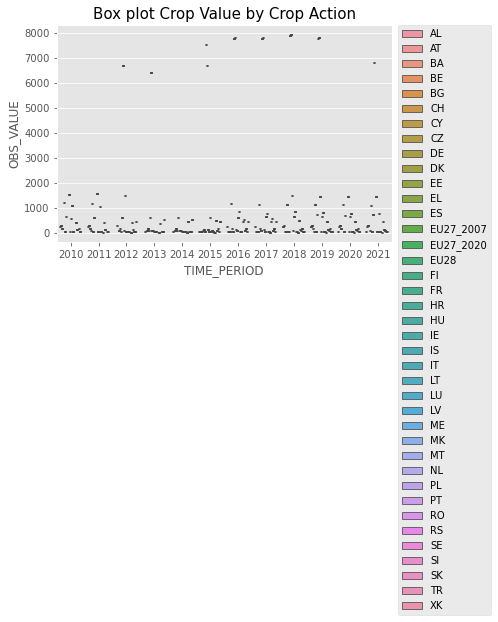

In [94]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'TIME_PERIOD', y ='OBS_VALUE', data=europeagri_consumer, hue = 'geo')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

